# Linear regression using the Normal Equation
This example is based on the book [1] and delivered as GitHub repository in [2].

[1] Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. O'Reilly Media.

[2] https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

In [1]:
import sys
import sklearn
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import timeit

In [2]:
# Generating a fake dataset (adding random noise to the linear function 4+3x)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

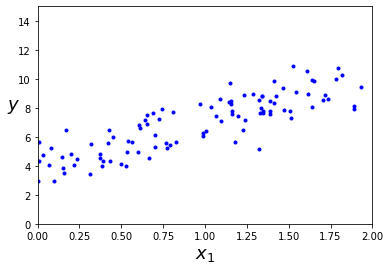

In [3]:
# Plotting the fake dataset
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Calculating $\theta$ using the Normal Equation
As discussed in the lecture, $\theta$ can be computed as:
 
$θ = (X^{T}*X)^{−1}*(X^T*y)$

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.9811302],
       [3.0823822]])

As you can see, the values obtained are not exactly the ones expected ($\theta_0 = 4$ and $\theta_1 = 3$) due to the random noise included in the input but quite close.

## Predicting using the calculated weights
Let's use this $\theta$ to predict the output for $x = 0$ and $x = 2$. They should results in values close to $4$ and $10$ respectively.

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.9811302 ],
       [10.14589461]])

## Representing the model's predictions
We can plot the model's solution as a line overlying the dataset points as follows.

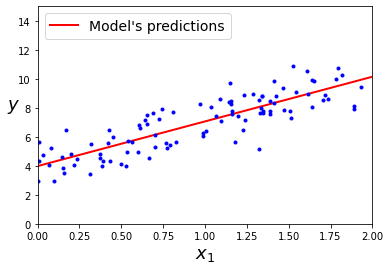

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Model's predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## Linear regression using Scikit-Learn
Obviously, there are simpler ways to perform linear regression. For example, Scilit-Learn provides the following function:

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.9811302]), array([[3.0823822]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.9811302 ],
       [10.14589461]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.9811302],
       [3.0823822]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[3.9811302],
       [3.0823822]])